
# Probleme de regresie <img src="images/regression.png" width="200">

## Obiective
* rezolvarea unor probleme de regresie/predictie 
* diferentierea intre regresie univariata, bivariata si multi-variata
* folosirea unor algoritmi liniari bazati pe metoda celor mai mici patrate 

## Cuvinte cheie:
* date de antrenare si date de testare 
* atribute/catacteristici ale datelor
* model de regresie
* eroarea de predictie


## Aspecte teoretice

Problemele de regresie identifica relatia de dependenta intre datele de iesire si datele de intrare ale unui probleme, adica pe baza unor caracteristici a datelor se doreste prezicearea unor valori asociate acestor date. Valorile prezise sunt de tip continu. 



<details>
  <summary>Remember the theory behind regression</summary>
 

Relatia de dependenta poate fi:
- liniara (tema abordata in acest laborator)
- ne-liniara (tema abordata in alt laborator)

### Exemple de probleme de regresie:
- predictia actiunilor la bursa in functie de anumiti indicatori economici 
- predictia consumului de inghetata in functie de temperatura si de numarul de copii dintr-o tabara

### Formalizare problema de regresie liniara:

Regresia liniara este un model liniar (un model care presupune ca exista o dependenta liniara intre variabilele de input X si variabila de output Y). Mai specific, variabila de iesire paote fi calculata  ca o combinatie a variabilelor de intrare. 

- datele se caracterizeaza prin $atribute$ ($x = (x_1, x_2, ..., x_3)$) si $output$ (atat atributele, cat si outputul sunt valori numerice continue)
- modelul (liniar) de predictie (regresorul): $y = f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$ 

### Metodologia rezolvarii unei probleme de regresie (liniara)

**Antrenare** 

> Input: un set de exemple etichetate $(x^i, y^i)$, cu $i \in \{1, 2, ..., trainDataSize\}$, $x^i$ - vectorul de atribute asociate unui exemplu, $y^i$ etichetata asociata exemplului $x^i$ (valoare numerica reala/float)

> Output: un model de regresie = regresor (adica valorile optime ale coeficientilor $w$ din ecuatia de regresie $f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$)

> Algoritm: 
- metoda celor mai mici patrate ($Least Square$) - in laboratorul de azi :)
- $Gradient Descent$ - in alt laborator :)

**Testare** 

> Input: un exemplu ne-etichetat $(x_{new})$, cu $x_{new}$ - vectorul de atribute asociate acelui exemplu

> Output: valoarea prezisa pentru exemplul $x_{new}$

> Algoritm:
Folosirea regresorului invatat (a coeficientilor) pentru a calcula valoarea outputului
$$y_{new} = f(x_{new}, w)$$

**Metoda celor mai mici patrate**

Presupunem cazul unei regresii univariate (un exemplu are un singur atribut, deci $f(x,w) = w_0 + w_1 * x_1$. 
Se doreste identificarea valorilor optime pentru coeficientii **w**=$[w_0, w_1]$ stiindu-se un set de $n$ exemple de antrenament de forma $(x^i, y^i)$, cu $i = 1, 2, ..., n$, $x^i = (x^i_1)$.

Se defineste o functie de cost: $cost(x) = \sum_{i=1}^{n}(y^i_{computed} - y^i)^2$. Se identifica punctul de minim al acestei functii, care duce la valorile optime pt **w**.

$$w_1 = \frac{n \sum_{i=1}^{n}(x^i * y^i) -\sum_{i=1}^{n}x^i * \sum_{i=1}^{n}y^i}{n \sum_{i=1}^{n}(x^i)^2 - (\sum_{i=1}^{n}x^i)^2} $$

$$w_0 = \frac{\sum_{i=1}^{n}y^i - w_1 \sum_{i=1}^{n}x^i}{n}$$

Pentru cazul unei regresii multi-variate ($m$ atribute): $f(x,w) = w_0 + w_1 * x_1 + w_2 * x_2 + ... w_m * x_m$) si un set de date cu $n$ exemple:

$\boldsymbol{w} = (X^{T}X)^{-1}X^{T}{Y}$,
unde $X = (x^i_{j})$, $Y = (y^i)$, $i = 1, 2, ..., n$, $j = 1, 2, ..., m$.





### Evaluarea performantei regresorului (a se vedea materialele din laboratorul 6)

- the absolute difference  (this is $L_1$ distance):
$$Error = \frac{1}{n} \times \sum_{i=1}^{n} |y^i - y^i_{computed}| = Mean Absolute Error (MAE)$$
- the square difference (this is the $L_2$ distance):
$$Error = \sqrt{\frac{1}{n} \times \sum_{i=1}^{n} (y^i - y^i_{computed}) ^ 2} = Root Mean Square Error (RMSE)$$ 

</details>

## Exemple

### Demo1


#### Problemă: Ce îi poate face pe oameni fericiți?

Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de fericire, etc.  Folsind datele aferente anului 2017 [here](https://www.kaggle.com/unsdsn/world-happiness#2017.csv), să se realizeze o predicție a gradului de fericire în funcție de Produsul intern brut. 

Deci avem o problema de regresie univariata $y = w_0 + w_1 * x$, unde:
- o variabila dependenta – y (gradul de fericire) si 
- o variabila independenta – x (PIB-ul).

Pasi in rezolvare:
* plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)
* impartire date pe train si test
* invatare model (cu tool generic si cu tool de least square)
* plot rezultate
* calcul metrici de performanta (eroarea)

In [1]:
# prerequisites 
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model

#### Pasul 1 - plot pt distributia datelor & plot pt “verificarea” liniaritatii (daca legatura intre y si x e una liniara)

In [3]:
# load data and consider a single feature (Economy..GDP.per.capita) and the output to be estimated (happiness)

def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


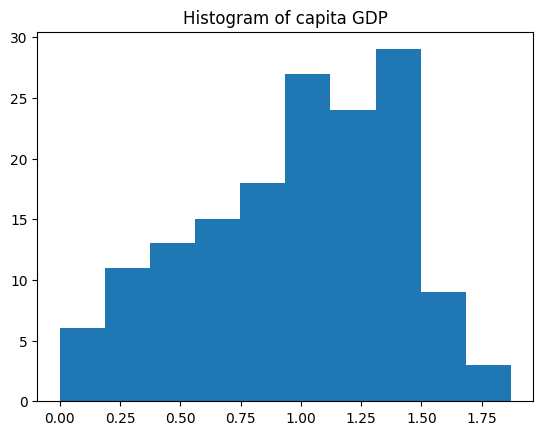

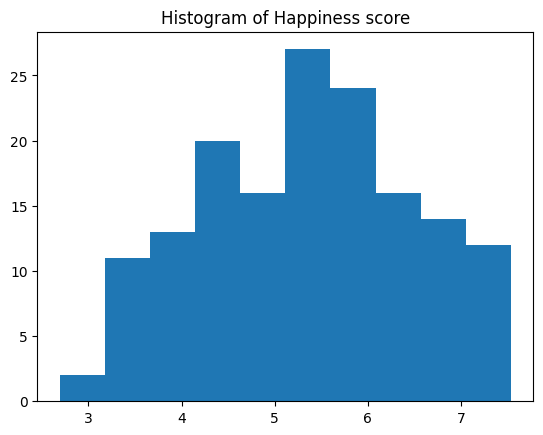

In [4]:
# see how the data looks (plot the histograms associated to input data - GDP feature - and output data - happiness)

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')

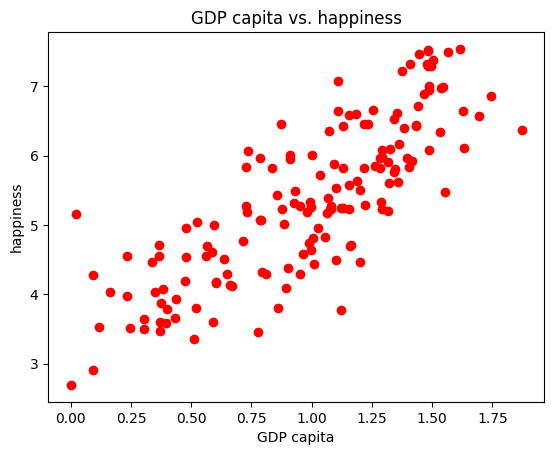

In [5]:
# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)

plt.plot(inputs, outputs, 'ro') 
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()


#### Pasul 2 - impartire date pe train si validation

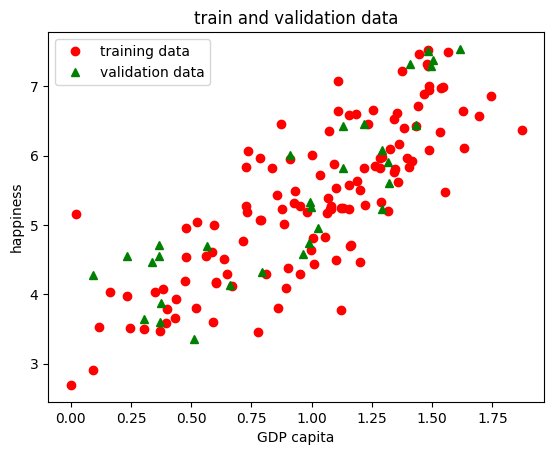

In [6]:
# Split the Data Into Training and Test Subsets
# In this step we will split our dataset into training and testing subsets (in proportion 80/20%).

# Training data set is used for learning the linear model. Testing dataset is used for validating of the model. All data from testing dataset will be new to model and we may check how accurate are model predictions.

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()


#### Pasul 3 - invatare model (cu tool generic si cu tool de least square)

In [10]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
# Prediction step: used the trained model to estimate the output for a new input

# using sklearn 
# training data preparation (the sklearn linear model requires as input training data as noSamples x noFeatures array; in the current case, the input must be a matrix of len(trainInputs) lineas and one columns (a single feature is used in this problem))
xx = [[el] for el in trainInputs]

# model initialisation
regressor = linear_model.LinearRegression()
# training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# save the model parameters
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

# # using developed code
# from myRegression import MyLinearUnivariateRegression

# # model initialisation
# regressor = MyLinearUnivariateRegression()
# # training the model by using the training inputs and known training outputs
# regressor.fit(trainInputs, trainOutputs)
# # save the model parameters
# w0, w1 = regressor.intercept_, regressor.coef_
# print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')


the learnt model: f(x) =  3.2007686226679013  +  2.150346096174106  * x


#### Pasul 4 - plot rezultate (model invatat, predictii)

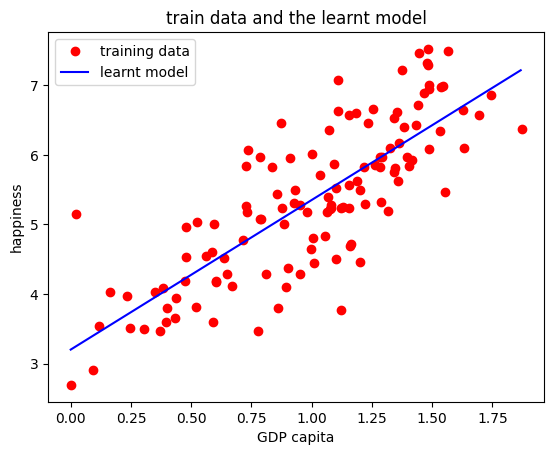

In [11]:

# plot the learnt model
# prepare some synthetic data (inputs are random, while the outputs are computed by the learnt model)
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

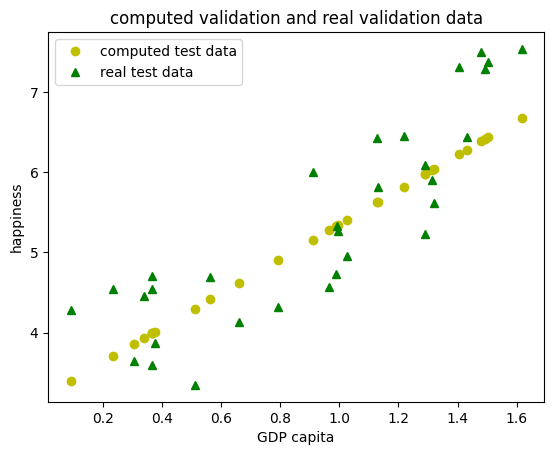

In [12]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]

# makes predictions for test data (by tool)
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

#### Pasul 5 - calcul metrici de performanta (eroarea)

In [13]:
# compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

# by using sklearn 
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.4142120438505253
prediction error (tool):   0.4142120438505253


#### Toti pasii impreuna

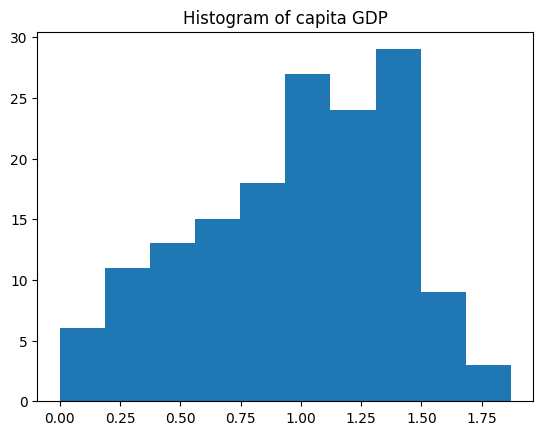

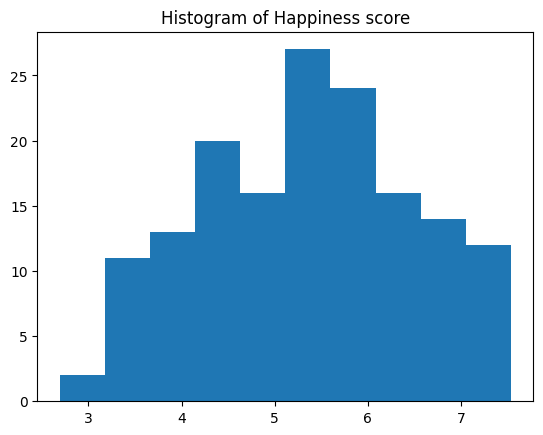

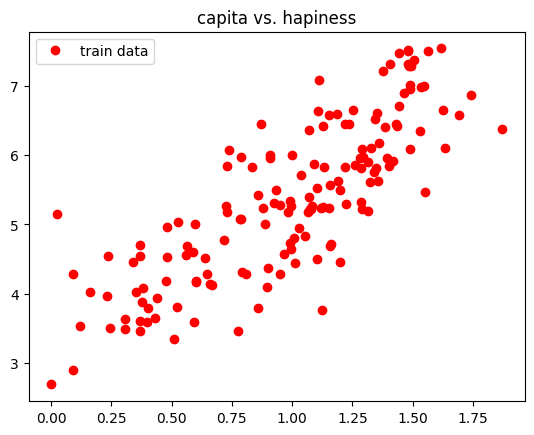

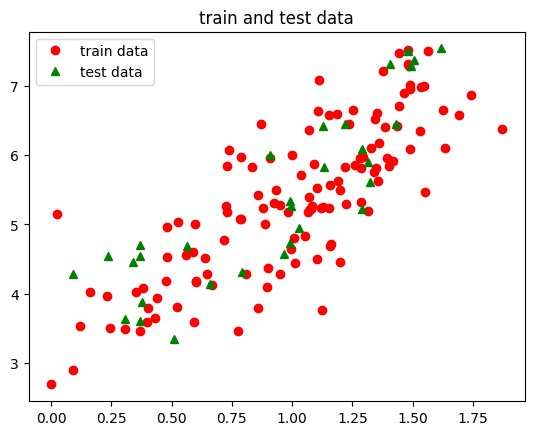

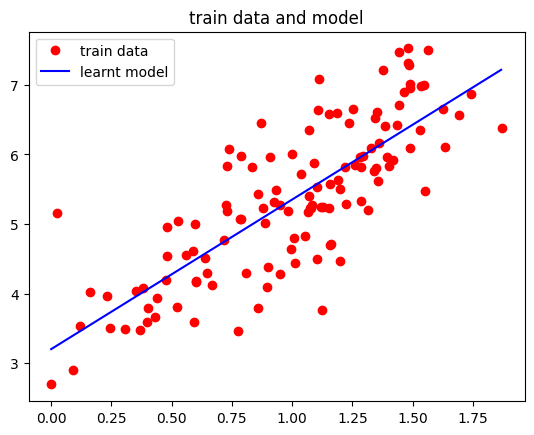

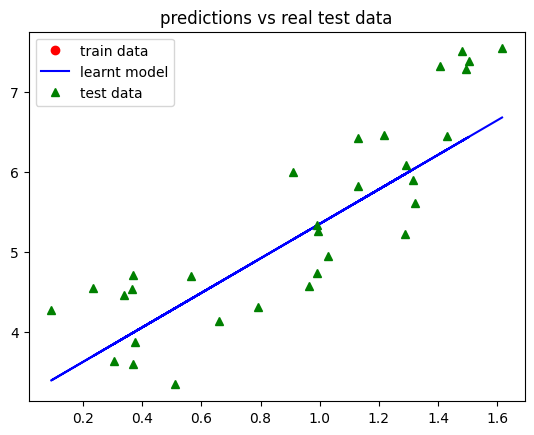

prediction error (manual):  0.4142120438505253
prediction error (tool):  0.4142120438505253


In [15]:
# put all steps togheter

# using sklearn 

def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
plotData(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

# split data into training data (80%) and testing data (20%)
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]
trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

# training step
xx = [[el] for el in trainInputs]
regressor = linear_model.LinearRegression()
# regressor = linear_model.SGDRegressor(max_iter =  10000)
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_

# plot the model
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 
plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")

#makes predictions for test data
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
#makes predictions for test data (by tool)
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictions vs real test data")

#compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("prediction error (manual): ", error)

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print("prediction error (tool): ", error)


## Tema 

**Ce îi poate face pe oameni fericiți?** 
Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de fericire, etc. 

Folsind datele aferente anului 2017 [link](https://www.kaggle.com/unsdsn/world-happiness#2017.csv), să se realizeze o predicție a gradului de fericire în funcție de Produsul intern brut si de gradul de libertate.

Concret, trebuie rezolvata o problema de regresie bivariata $y = w_0 + w_1 * x_1 + w_2 * x_2$, unde 
- o variabila dependenta – $y$ (gradul de fericire)
- 2 variabile independente – $x_1$ (PIB), $x_2$ (gradul de libertate).

Se respecta aceeasi metodologie ca si la partea live/demo (doar ca trebuie sa se foloseasca 2 features). 

Algoritmul de regresie prin metoda celor mai mici patrate poate fi:

- preluat dintr-un tool/API
- dezvoltat pe cont propriu. 